In [61]:
from my_weapon import *
from IPython.display import display
from tqdm import tqdm_notebook as tqdm
import matplotlib
from datetime import datetime
from fake_identify import Are_you_IRA
from SQLite_handler import find_name
import graph_tool.all as gt
from pprint import pprint


Putin = Are_you_IRA()

sns.set(style="darkgrid", font_scale=1.5)
sns.set_palette("coolwarm", 8)
ira_c = sns.color_palette("coolwarm", 10)[9]
all_c = sns.color_palette("coolwarm", 10)[0]

## IRA as influencers

分析IRA是不是影响力比较大的节点

In [55]:
# 方向 both undir out in

import graph_tool.all as gt
from pprint import pprint

def build_CI_rank(graph_file):
    rst = {}
    print(f"------------------{graph_file}------------------")
    g = gt.load_graph(graph_file)
    user_CI = {g.vp.id[v]: g.vp.CI_out[v] for v in g.vertices()}
    rst["out_CI"] = user_CI
    st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
    rank = {d[0]: i + 1 for i, d in enumerate(st_user_CI)}
    print(f"Top 25 out:")
    pprint(st_user_CI[:25])
    
    rst["out_id"] = st_user_CI
    rst["out_rank"] = rank

    user_CI = {g.vp.id[v]: g.vp.CI_in[v] for v in g.vertices()}
    rst["in_CI"] = user_CI
    st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
    rank = {d[0]: i + 1 for i, d in enumerate(st_user_CI)}
    print("Top 25 in:")
    pprint(st_user_CI[:25])
    
    rst["in_id"] = st_user_CI
    rst["in_rank"] = rank

    if graph_file.endswith("IRA_two_layers.gt"):
        user_CI = {g.vp.id[v]: g.vp.CI_undir[v] for v in g.vertices()}
        rst["undir_CI"] = user_CI
        st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
        rank = {d[0]: i + 1 for i, d in enumerate(st_user_CI)}
#         print("Top 10 undir:")
#         pprint(st_user_CI[:10])

        rst["undir_id"] = st_user_CI
        rst["undir_rank"] = rank
    
#     user_CI = {g.vp.id[v]: g.vp.CI_undir[v] for v in g.vertices()}
#     rst["undir_CI"] = user_CI
#     st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
#     rst["undir_id"] = st_user_CI
    
#     user_CI = {g.vp.id[v]: g.vp.CI_both[v] for v in g.vertices()}
#     rst["both_CI"] = user_CI
#     st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
#     rst["both_id"] = st_user_CI
    return rst

In [56]:
def get_cdf_pdf(data, mini=0, maxi=0, step=0, norm=True, scale=False):
    if scale:
        data = data.apply(np.log10)
    
    if maxi == 0:
        maxi = data.max()
    if step == 0:
        try:
            step = int((maxi - mini) / 50)
            if step == 0:
                step = 1
        except:
            step = 1
            
    print(mini, maxi, step)
    x = np.arange(mini, maxi, step, dtype=int)
    cdf = [0] * len(x)
    pdf = [0] * len(x)
    count = 0
    for d in data:
        d = float(d)
        if d < mini or d > maxi:
            continue
        count += 1
        for i in range(len(x)):
            if i == (len(x) - 1) and d >= x[i]:
                pdf[i] += 1
            elif d >= x[i] and d < x[i+1]:
                pdf[i] += 1

            if d >= x[i]:
                cdf[i] += 1

    if norm:
        cdf = [c / count for c in cdf]
        pdf = [p / count for p in pdf]

    x = pd.Series(x)
    cdf = pd.Series(cdf)
    pdf = pd.Series(pdf)
    
    return x, cdf, pdf

In [57]:
labels = [
    "fake",
    "extreme bias (right)",
    "right",
    "right leaning",
    "center",
    "left leaning",
    "left",
    "extreme bias (left)",
    "local",
]

# all_users = pd.read_csv("data/all-users-mbfc.csv", index_col="user_id", dtype={"user_id": str})
users = pd.read_csv("data/all-users.csv", index_col="user_id",
                    usecols =["user_id", "is_IRA"], dtype={"user_id": str, "is_IRA": int})
IRA_users = users[users.is_IRA > 0]
print(len(IRA_users))

360


In [ ]:
IRA_user_list = []
for u in IRA_users.index:
    if u in reversed_ira_map:
        IRA_user_list.append(reversed_ira_map[u])
    else:
        IRA_user_list.append(u)

json.dump(IRA_user_list, open("bingo_IRA_users.json", "w"))

In [58]:
ira_map = json.load(open("data/IRA_map.json"))

In [59]:
reversed_ira_map = {v: k for k, v in ira_map.items() if len(k) == 64}

------------------disk/network/fake.gt------------------
Top 25 out:
[('18643437', 17124306472),
 ('109065990', 15613472764),
 ('18856867', 13178750472),
 ('14669951', 11321630328),
 ('17980523', 10921818258),
 ('25073877', 10013443176),
 ('19211550', 9839434322),
 ('707278892801765377', 8958595140),
 ('825501626', 8881062705),
 ('4831603043', 8413322412),
 ('39344374', 8123221811),
 ('2242085304', 7828695144),
 ('4855687055', 6663663776),
 ('14505245', 6297941482),
 ('3022045469', 6135505574),
 ('16589206', 6022155805),
 ('4510755552', 5907775338),
 ('4717892303', 5459595464),
 ('3914047581', 5426643000),
 ('2728672957', 5120087162),
 ('1575689569', 4873297572),
 ('704034081898668032', 4851152800),
 ('1564676498', 4492316324),
 ('19173608', 4312767323),
 ('2845849081', 4045949835)]
Top 25 in:
[('711393889731657732', 210375693),
 ('3321952723', 78977860),
 ('2545326607', 73945340),
 ('905898240', 63231123),
 ('173119648', 58203000),
 ('884311340', 55014102),
 ('1418775942', 53832917),


'top 10 IRA fake_out'

[('4224729994', 304),
 ('4272870988', 363),
 ('4437444442', 467),
 ('3990577513', 629),
 ('4218156466', 777),
 ('4224912857', 791),
 ('789266125485998080', 810),
 ('4209684039', 938),
 ('4355797094', 1002),
 ('4311371968', 1135)]

'top 10 IRA fake_in'

[('1679279490', 243),
 ('1671234620', 1308),
 ('1662779209', 2134),
 ('2606301939', 2869),
 ('1661246144', 3041),
 ('2491081213', 4280),
 ('2671070290', 4315),
 ('1629828379', 4754),
 ('2535166748', 5275),
 ('3083844539', 5282)]

------------------disk/network/extreme bias (right).gt------------------
Top 25 out:
[('25073877', 39296229588),
 ('39308549', 32627052909),
 ('457984599', 26613250755),
 ('16589206', 23551250226),
 ('14669951', 19601072934),
 ('41634520', 19135455066),
 ('282695161', 19000511026),
 ('347627434', 14108794320),
 ('17980523', 12219797376),
 ('39344374', 11416918337),
 ('18643437', 10980086280),
 ('26487169', 9829542393),
 ('471672239', 9226147240),
 ('96442308', 8430325536),
 ('455764741', 7739744286),
 ('729676086632656900', 7548500596),
 ('275276082', 7475742008),
 ('17995040', 7361538021),
 ('2188423838', 6827389236),
 ('3092154496', 6782021232),
 ('779739206339928064', 6257935341),
 ('3914047581', 6094780296),
 ('620571475', 6063048420),
 ('3022045469', 5372913999),
 ('1065869268', 5214625083)]
Top 25 in:
[('714947334', 96446783),
 ('3321952723', 82422495),
 ('905898240', 79045164),
 ('3647712853', 68491640),
 ('19921268', 67270000),
 ('141422795', 67047010),
 ('708458185494040576', 

'top 10 IRA extreme bias (right)_out'

[('4272870988', 354),
 ('3990577513', 356),
 ('4437444442', 586),
 ('4311371968', 971),
 ('4332740714', 1175),
 ('4355797094', 1343),
 ('4218156466', 1411),
 ('4208754922', 1949),
 ('4224729994', 2389),
 ('703303258476036096', 2726)]

'top 10 IRA extreme bias (right)_in'

[('1679279490', 125),
 ('1671234620', 504),
 ('1662779209', 1450),
 ('2606301939', 1487),
 ('1661246144', 1973),
 ('2671070290', 3684),
 ('1629828379', 4248),
 ('2491081213', 4403),
 ('1651693646', 5534),
 ('1833223908', 5876)]

------------------disk/network/right.gt------------------
Top 25 out:
[('1367531', 63795855132),
 ('25073877', 39216766293),
 ('18956073', 26533958938),
 ('17469289', 23392219305),
 ('14669951', 21978450170),
 ('78523300', 18065335250),
 ('16589206', 14843225628),
 ('147725246', 14285756780),
 ('380285402', 13357862178),
 ('37764422', 13197782010),
 ('237403203', 12899369636),
 ('471672239', 11491920075),
 ('18247062', 11014775948),
 ('15513604', 9953886410),
 ('18643437', 9868240554),
 ('26487169', 9771604165),
 ('729676086632656900', 8894179656),
 ('50769180', 8700181254),
 ('3016071993', 6972527796),
 ('38495835', 6961252050),
 ('10774652', 6498682432),
 ('56413858', 6317767170),
 ('39344374', 5867492400),
 ('1084375028', 5728589339),
 ('39349894', 5464243476)]
Top 25 in:
[('714947334', 54753970),
 ('2341977604', 45773910),
 ('3321952723', 44813938),
 ('19921268', 43585695),
 ('708458185494040576', 40084470),
 ('905898240', 39682440),
 ('173119648', 38138760),
 ('3430464335', 380378

'top 10 IRA right_out'

[('4224729994', 296),
 ('4272870988', 320),
 ('3990577513', 486),
 ('4437444442', 652),
 ('4209684039', 667),
 ('4208754922', 1240),
 ('4224912857', 1344),
 ('3969530725', 1361),
 ('2912754262', 1814),
 ('4311371968', 1830)]

'top 10 IRA right_in'

[('1679279490', 83),
 ('1671234620', 493),
 ('1662779209', 1426),
 ('1661246144', 1452),
 ('2606301939', 1711),
 ('1651693646', 3889),
 ('2491081213', 4070),
 ('1629828379', 4984),
 ('3083844539', 5212),
 ('2671070290', 6079)]

------------------disk/network/right leaning.gt------------------
Top 25 out:
[('3108351', 4091730455),
 ('25073877', 1292970291),
 ('14662354', 1040681472),
 ('64643056', 873228641),
 ('115754870', 574353120),
 ('471672239', 520103100),
 ('16311797', 495178480),
 ('705706292', 394890899),
 ('729676086632656900', 381133501),
 ('14669951', 335703975),
 ('26487169', 218362586),
 ('7228682', 189847424),
 ('779739206339928064', 155424126),
 ('1084375028', 143173528),
 ('620571475', 135804812),
 ('18772897', 133578690),
 ('4510755552', 121847936),
 ('328878936', 105445678),
 ('50769180', 97618625),
 ('711188856943411200', 92957616),
 ('229139732', 85959165),
 ('4289460455', 80376588),
 ('48120914', 79976776),
 ('18247062', 73620249),
 ('24127811', 71519154)]
Top 25 in:
[('2341977604', 307914),
 ('714947334', 237005),
 ('712552463174393856', 219052),
 ('1400514948', 215397),
 ('754791686887399424', 208103),
 ('2545326607', 199563),
 ('3321952723', 193440),
 ('3376927462', 185614),
 ('9058982

'top 10 IRA right leaning_out'

[('4355797094', 556),
 ('4272870988', 646),
 ('2912754262', 764),
 ('4224729994', 888),
 ('4218156466', 1595),
 ('4289431230', 1802),
 ('2743327187', 2202),
 ('3990577513', 2410),
 ('4208754922', 4885),
 ('4311371968', 19354)]

'top 10 IRA right leaning_in'

[('1679279490', 38),
 ('1671234620', 631),
 ('1662779209', 1200),
 ('2606301939', 2546),
 ('1661246144', 4319),
 ('1629828379', 5195),
 ('1651693646', 7287),
 ('2491081213', 7398),
 ('1685718216', 8658),
 ('1720117201', 8735)]

------------------disk/network/center.gt------------------
Top 25 out:
[('759251', 237070044862),
 ('1917731', 183934572250),
 ('9300262', 97096882980),
 ('13850422', 69331524960),
 ('1652541', 29331669320),
 ('15754281', 26394682867),
 ('16017475', 23475320346),
 ('426802833', 19602018200),
 ('34713362', 18966895580),
 ('2303751216', 17793041408),
 ('227837742', 16688625954),
 ('428333', 15313837422),
 ('51241574', 15285536792),
 ('14529929', 14643925905),
 ('564111558', 13975916427),
 ('471672239', 12583179840),
 ('14669951', 11871457560),
 ('14515799', 11283188600),
 ('20562637', 10441272897),
 ('2097571', 9750412341),
 ('16589206', 7933037868),
 ('25073877', 6868447500),
 ('1375289149', 6200383124),
 ('326255267', 6061664049),
 ('14855994', 5469008661)]
Top 25 in:
[('612057704', 38921850),
 ('727840825661661184', 21234020),
 ('724500918255788032', 21128631),
 ('3789299356', 20131552),
 ('382370203', 19992310),
 ('312248392', 19605940),
 ('883421593', 19412055),
 ('73125675911799603

'top 10 IRA center_out'

[('4208754922', 759),
 ('4224729994', 797),
 ('4272870988', 1791),
 ('4437233895', 4185),
 ('4224912857', 4896),
 ('4289431230', 5386),
 ('4218156466', 6151),
 ('2547141851', 6192),
 ('4437444442', 6722),
 ('2530830345', 7764)]

'top 10 IRA center_in'

[('1679279490', 592),
 ('1671234620', 2986),
 ('1652987412', 8092),
 ('1661246144', 9305),
 ('2535166748', 9722),
 ('1662779209', 9735),
 ('1629828379', 12002),
 ('2606301939', 12702),
 ('2671070290', 16422),
 ('1868496344', 21761)]

------------------disk/network/left leaning.gt------------------
Top 25 out:
[('807095', 318621944355),
 ('2467791', 155919080419),
 ('28785486', 120806891520),
 ('14173315', 94794510156),
 ('15164565', 75385869840),
 ('15012486', 68903217786),
 ('8953122', 68670723160),
 ('215207998', 64581603140),
 ('2347049341', 60237326196),
 ('16815644', 58547988192),
 ('18622869', 56166502715),
 ('14434063', 45954281736),
 ('87818409', 45780112284),
 ('1020058453', 39705826224),
 ('9763482', 38776317712),
 ('16664681', 37395463764),
 ('1339835893', 36049372736),
 ('61734492', 34956999195),
 ('16686144', 33426068717),
 ('29465136', 31186723760),
 ('2836421', 29951985575),
 ('14412533', 28454251131),
 ('35773039', 24331405040),
 ('326255267', 22886129752),
 ('48120914', 21674390280)]
Top 25 in:
[('612057704', 225853174),
 ('883421593', 160626158),
 ('3789299356', 152237700),
 ('382370203', 151839375),
 ('187657428', 135376995),
 ('312248392', 134649765),
 ('4099926287', 133401760),
 ('380664031', 1

'top 10 IRA left leaning_out'

[('2743327187', 1262),
 ('4355797094', 1900),
 ('2624554209', 2989),
 ('4208754922', 3172),
 ('4272870988', 4667),
 ('4508630900', 4833),
 ('4437444442', 6295),
 ('3312143142', 6741),
 ('3990577513', 6949),
 ('4218156466', 8027)]

'top 10 IRA left leaning_in'

[('1679279490', 3823),
 ('1652987412', 6798),
 ('1671234620', 9047),
 ('1688370956', 10607),
 ('2606301939', 12686),
 ('1676377446', 12790),
 ('1670149272', 13007),
 ('1859674386', 14912),
 ('2492948562', 15208),
 ('1691736218', 16964)]

------------------disk/network/left.gt------------------
Top 25 out:
[('14511951', 46591400344),
 ('14293310', 33259421664),
 ('16012783', 25895483642),
 ('16041234', 25053992028),
 ('14677919', 22233076372),
 ('15458694', 18810655594),
 ('18510860', 15277715024),
 ('14717197', 13125896542),
 ('16955991', 12883175616),
 ('15463671', 11753304758),
 ('55355654', 10966165821),
 ('13493302', 10849686625),
 ('21268897', 10154716863),
 ('45564482', 9495388680),
 ('2836421', 9289968376),
 ('15464697', 8536635670),
 ('2329066872', 8525056266),
 ('972651', 7696334165),
 ('15220768', 7413234572),
 ('49698134', 5029813012),
 ('349803020', 4803976535),
 ('1947301', 4409445138),
 ('16892481', 4203561168),
 ('20818801', 4186995534),
 ('377778216', 4070236950)]
Top 25 in:
[('612057704', 144809912),
 ('883421593', 105259464),
 ('382370203', 99576513),
 ('380664031', 95158991),
 ('312248392', 91587829),
 ('815871284', 87428664),
 ('116504222', 86135430),
 ('727840825661661184', 76868022),
 ('21495530',

'top 10 IRA left_out'

[('4208754922', 2223),
 ('1687183549', 2577),
 ('4437233895', 4376),
 ('4437444442', 8538),
 ('1660183028', 17485),
 ('1691736218', 17488),
 ('1768259989', 23303),
 ('1652138929', 33640),
 ('4272870988', 34001),
 ('1716228906', 34642)]

'top 10 IRA left_in'

[('1679279490', 4601),
 ('1688370956', 5667),
 ('1652987412', 7254),
 ('2492948562', 10711),
 ('1660804459', 11491),
 ('1716228906', 11787),
 ('1670149272', 12632),
 ('1859674386', 12822),
 ('1684524144', 13332),
 ('1652262638', 13888)]

------------------disk/network/extreme bias (left).gt------------------
Top 25 out:
[('487600344', 2241919773),
 ('15115280', 963212406),
 ('18464266', 710255559),
 ('14513611', 686536974),
 ('4794182534', 491082000),
 ('2467720274', 390302184),
 ('732515283902943232', 327626532),
 ('980611', 312319392),
 ('479562736', 283982280),
 ('193365375', 268763740),
 ('87957969', 262423404),
 ('18082945', 213489399),
 ('519728191', 200239326),
 ('878284831', 185475678),
 ('1965905755', 182550494),
 ('716371621380890624', 134477640),
 ('93111391', 128358961),
 ('291774022', 125607694),
 ('545474475', 116849052),
 ('499073990', 108088128),
 ('849169945', 106817862),
 ('2316383071', 99336350),
 ('754135908', 95208160),
 ('558293436', 90074980),
 ('21833728', 86245705)]
Top 25 in:
[('15115280', 16194696),
 ('612057704', 5046300),
 ('3110461544', 4383886),
 ('24247106', 4322015),
 ('883421593', 4113824),
 ('2730345168', 3319811),
 ('4826677880', 3188871),
 ('731256759117996032', 3142040),
 ('2670926

'top 10 IRA extreme bias (left)_out'

[('2535353390', 53449),
 ('1518857420', 53628),
 ('1653553555', 56999),
 ('1681162956', 57250),
 ('1655194147', 58330),
 ('1710804738', 59940),
 ('1679279490', 61109),
 ('1651692980', 69629),
 ('1716228906', 70217),
 ('1685771767', 71725)]

'top 10 IRA extreme bias (left)_in'

[('1651692980', 9128),
 ('1518857420', 12421),
 ('1652987412', 12967),
 ('1716228906', 14955),
 ('1655194147', 15354),
 ('1688370956', 16666),
 ('1652262638', 17909),
 ('1670318690', 18774),
 ('1679279490', 22132),
 ('1617939218', 22792)]

------------------disk/network/local.gt------------------
Top 25 out:
[('16589206', 6408402),
 ('9721292', 5811397),
 ('471672239', 5801600),
 ('14340977', 4338400),
 ('14669951', 4044064),
 ('14495726', 3149538),
 ('14302121', 2364509),
 ('48120914', 1874600),
 ('225265639', 1581503),
 ('14221917', 1532448),
 ('39344374', 774177),
 ('82167518', 741455),
 ('710990834972233728', 705320),
 ('24938348', 698857),
 ('50769180', 601854),
 ('24779833', 471450),
 ('21792170', 449334),
 ('196168350', 413154),
 ('32871086', 407652),
 ('20508720', 366360),
 ('83668232', 330775),
 ('779739206339928064', 319249),
 ('729676086632656900', 303303),
 ('14855994', 252395),
 ('20480549', 242786)]
Top 25 in:
[('199636296', 12390),
 ('187657428', 5252),
 ('3300720066', 3600),
 ('3436249294', 3552),
 ('708309848', 3468),
 ('612057704', 3300),
 ('2421228369', 2976),
 ('2545326607', 2275),
 ('704060092065423361', 2139),
 ('312248392', 1989),
 ('183753455', 1960),
 ('560833871', 1725),
 ('2740546270', 1610),
 

'top 10 IRA local_out'

[('2587843805', 252),
 ('2547141851', 255),
 ('3990577513', 316),
 ('2530830345', 351),
 ('2753338899', 1290),
 ('2743327187', 1418),
 ('2495567768', 1550),
 ('2611151319', 1825),
 ('3091936475', 3916),
 ('4332740714', 6669)]

'top 10 IRA local_in'

[('1652987412', 340),
 ('1675280893', 738),
 ('1649487510', 888),
 ('1682444790', 1204),
 ('1671234620', 1264),
 ('1670149272', 1612),
 ('1527133837', 1613),
 ('1652138929', 1689),
 ('1691000604', 1820),
 ('1688370956', 1890)]

fake_out                      186/207591
fake_in                        21/207591
extreme bias (right)_out      249/267918
extreme bias (right)_in         4/267918
right_out                     195/381786
right_in                        2/381786
right leaning_out             395/254312
right leaning_in                2/254312
center_out                    561/975548
center_in                     108/975548
left leaning_out            1118/1196330
left leaning_in              617/1196330
left_out                     1893/587617
left_in                       942/587617
extreme bias (left)_out       3757/83672
extreme bias (left)_in        6268/83672
local_out                      154/96229
local_in                        12/96229
dtype: object

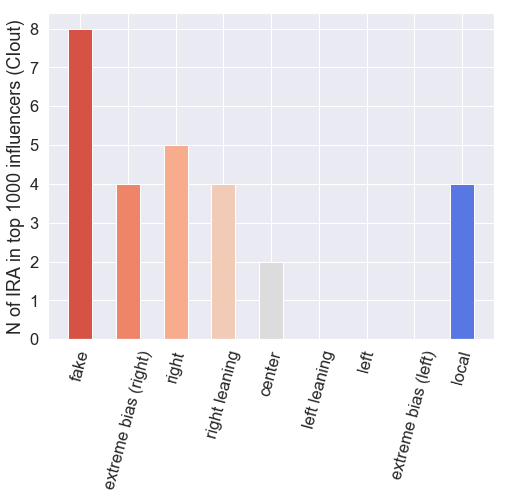

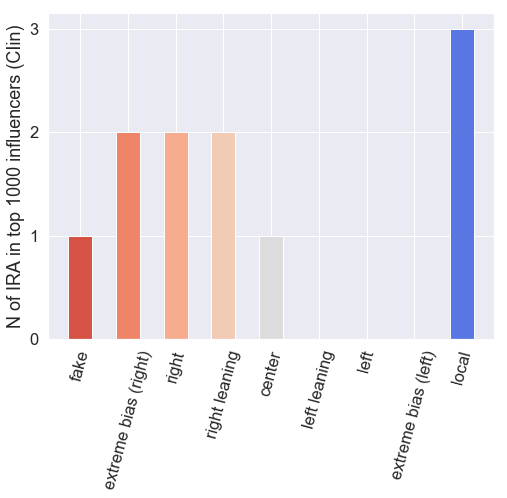

In [63]:
top_num = 1000

len_intersection = {}
dict_CI = defaultdict(dict)
dict_ira_rank = {}
top_10_users = {}

for label in tqdm(labels):
    # print(label, "...")
    rst = build_CI_rank("disk/network/{}.gt".format(label))
    
    for dire in ["out", "in"]:
        # print(label, dire, "...")
        user_CI = rst[dire + "_CI"]
        rank = rst[dire + "_rank"]
        ira_rank = {}
        # top list
        set_CI_users = set([d[0] for d in rst[dire + "_id"][:top_num]])

        set_source_users = set()
        IRA_CI = []
        for user_id, row in IRA_users.iterrows():
            set_source_users.add(user_id)
            try:
                IRA_CI.append(user_CI[user_id])
                ira_rank[user_id] = rank[user_id]
            except:
                pass
            
        # print(f"---- IRA rank ---- {label} {dire}")
        ira_rank = sorted(ira_rank.items(), key=lambda d: d[1])
        top_10_users[f"{label}_{dire}"] = ira_rank[:10]
        display(f"top 10 IRA {label}_{dire}", ira_rank[:10])
        
        len_intersection[dire + "_" + label] = len(set_CI_users & set_source_users)
        # print("参与人数：", len(IRA_CI), len(sort_user_CI))
        IRA_CI = pd.Series(IRA_CI)
        IRA_CI_sum = IRA_CI.sum()
        
        # 总体排名
        # print("IRA sum", IRA_CI_sum, np.log(IRA_CI_sum))
        for i, d in enumerate(rst[dire + "_id"]):
            if IRA_CI_sum >= d[1] :
                break
        dict_ira_rank[label + "_" + dire] = f"{i+1}/{len(user_CI)}"

        non_CI = pd.Series([v for u, v in user_CI.items() if u not in ira_rank])
        all_CI = pd.Series(list(user_CI.values()))

        IRA_CI_mean = IRA_CI.mean()
        all_CI_mean = all_CI.mean()
        non_CI_mean = non_CI.mean()

        dict_CI[label][dire + "_IRA"] = IRA_CI_mean
        dict_CI[label][dire + "_All users"] = all_CI_mean
        dict_CI[label][dire + "_non_IRA"] = non_CI_mean
        
        dict_CI[label][dire + "_IRA dist"] = IRA_CI
        dict_CI[label][dire + "_All dist"] = all_CI
        dict_CI[label][dire + "_non dist"] = non_CI

        
# print(dict_CI)
compare_CI_value = pd.DataFrame(dict_CI).transpose()
# compare_CI_value
display(pd.Series(dict_ira_rank))


# Top 1000
def plot_corr(cor, dire):
    # display(cor)
    plt.figure(figsize=(8, 6))
    x = range(len(labels))
    for i in x:
        plt.bar(i, cor[dire + "_" + labels[i]], width=0.5, 
                  color=sns.color_palette("coolwarm", len(labels))[len(labels) - 1 - i])
    plt.xticks(x, labels, rotation=75)

    if dire == "in":
        plt.yticks(range(4))
        
    plt.ylabel(f'N of IRA in top {top_num} influencers (CI{dire})'.format(top_num))
    plt.savefig("fig/size-of-inter-{}-{}.pdf".format(top_num, dire),
                dpi=300, bbox_inches='tight')
    plt.show()
    plt.tight_layout()
    plt.close()

# for dire in ["out", "undir", "both", "in"]:
for dire in ["out", "in"]:
    plot_corr(len_intersection, dire)


# from scipy.stats import ks_2samp

# # for dire in ["out", "undir", "both", "in"]:
# for dire in ["out", "in"]:
#     ax = plt.figure(figsize=(10, 6))
#     plt.ylabel("Average CI score")
#     compare_CI_value[dire + "_IRA"].plot.bar(width=0.3, position=1.1, 
#                                      color=ira_c, label="IRA")
#     compare_CI_value[dire + "_non_IRA"].plot.bar(width=0.3, position=-0.1, 
#                                      color=all_c, label="non-IRA")
    
#     print(compare_CI_value[dire + "_IRA"])
#     print(compare_CI_value[dire + "_non_IRA"])
    
#     # 显著性检验    
#     _ticks = []
#     for label in labels:
#         d = dict_CI[label]
#         pvalue = ks_2samp(d[dire + "_IRA dist"], d[dire + "_non dist"])[1]
#         print(label, dire, "pvalue = {:.3f}".format(pvalue))
#         if pvalue < 0.001:
#             _ticks.append(label + "\n p<0.001***")
#         elif pvalue < 0.01:
#             _ticks.append("{}\n p={:.3f}**".format(label, pvalue))
#         elif pvalue < 0.05:
#             _ticks.append("{}\n p={:.3f}*".format(label, pvalue))
#         else:
#             _ticks.append("{}\n p>0.05".format(label))
    
#     plt.xticks(range(len(labels)), _ticks, rotation=40, fontsize=12)
#     plt.xlim(-1, len(labels))
#     plt.legend()

#     plt.tight_layout()
#     plt.savefig("fig/CI_{}.pdf".format(dire), dpi=300, bbox_inches='tight')
#     plt.show()
#     plt.close()

## 两层交互网络（未划分社团）

In [7]:
G = nx.read_gpickle("data/IRA-two-layers.gpickle")
IRA_users = [n for n in G.nodes() if G.node[n]["IRA"] == 1]
len(IRA_users)

510

In [211]:
top_num = 100

len_intersection = {}
dict_CI = defaultdict(dict)
top_10_users = {}

rst = build_CI_rank("data/IRA_two_layers.gt")

for dire in ["out", "in", "undir"]:
    user_CI = rst[dire + "_CI"]
    rank = rst[dire + "_rank"]
    
    # top 100 list
    set_CI_users = set([d[0] for d in rst[dire + "_id"][:top_num]])

    set_source_users = set()
    IRA_CI = []
    ira_rank = {}
    for user_id in IRA_users:
        set_source_users.add(user_id)
        try:
            IRA_CI.append(user_CI[user_id])
            ira_rank[user_id] = rank[user_id]
            # print(user_id, rank[user_id])
        except:
            pass

    # print(f"---- IRA rank ---- {label} {dire}")
    ira_rank = sorted(ira_rank.items(), key=lambda d: d[1])
    top_10_users[dire] = ira_rank[:10]


    len_intersection[dire] = len(set_CI_users & set_source_users)
    

from pprint import pprint
pprint(len_intersection)
pprint(top_10_users)

------------------data/IRA_two_layers.gt------------------
Top 25 out:
[('4224729994', 172612652250),
 ('274891222', 129275984000),
 ('4272870988', 114675165760),
 ('4218156466', 105542500816),
 ('710990834972233728', 94809306592),
 ('1367531', 92848353048),
 ('347627434', 88280598912),
 ('16589206', 87002488287),
 ('33529092', 82434955036),
 ('78523300', 75008398640),
 ('216776631', 73659670092),
 ('759251', 73405914054),
 ('197496309', 72482714172),
 ('3284112337', 69117844488),
 ('282695161', 67761529836),
 ('466144416', 66858562687),
 ('1339835893', 66418217072),
 ('39344374', 64309558968),
 ('26487169', 62809482449),
 ('4236806414', 61592078893),
 ('4261318354', 60832392040),
 ('393190233', 60071900824),
 ('1075681177', 59764210688),
 ('1536791610', 59074422600),
 ('3677742792', 59053597825)]
Top 25 in:
[('1679279490', 25639761996),
 ('3376927462', 15888574484),
 ('1671234620', 10196727984),
 ('758683522118791168', 6215935310),
 ('1662779209', 5193542025),
 ('2606301939', 50067629

In [222]:
top_users = [('4224729994', 172612652250),
             ('274891222', 129275984000),
             ('4272870988', 114675165760),
             ('4218156466', 105542500816),
             ('710990834972233728', 94809306592),
             ('1367531', 92848353048),
             ('347627434', 88280598912),
             ('16589206', 87002488287),
             ('33529092', 82434955036),
             ('78523300', 75008398640),
             ('216776631', 73659670092),
             ('759251', 73405914054),
             ('197496309', 72482714172),
             ('3284112337', 69117844488),
             ('282695161', 67761529836),
             ('466144416', 66858562687),
             ('1339835893', 66418217072),
             ('39344374', 64309558968),
             ('26487169', 62809482449),
             ('4236806414', 61592078893),
             ('4261318354', 60832392040),
             ('393190233', 60071900824),
             ('1075681177', 59764210688),
             ('1536791610', 59074422600),
             ('3677742792', 59053597825)]

top_users_in = [('1679279490', 25639761996),
 ('3376927462', 15888574484),
 ('1671234620', 10196727984),
 ('758683522118791168', 6215935310),
 ('1662779209', 5193542025),
 ('2606301939', 5006762970),
 ('2671070290', 4992389550),
 ('1661246144', 4849513384),
 ('3438999494', 4550574708),
 ('2491081213', 4518696113),
 ('29350302', 4353767660),
 ('2545326607', 4069558080),
 ('2882013788', 3892137998),
 ('552335271', 3772931400),
 ('1400514948', 3697138440),
 ('247558666', 3543471481),
 ('2535166748', 3515293392),
 ('3408262787', 3464381004),
 ('3083844539', 3353930050),
 ('2341977604', 3204744920),
 ('19921268', 3190017068),
 ('2980186012', 3072018600),
 ('3321952723', 3069986339),
 ('1629828379', 3050324005),
 ('714947334', 2922985676)]


from SQLite_handler import find_name
from fake_identify import Are_you_IRA

Putin = Are_you_IRA()

for u in top_users:
    if Putin.fuck(u[0]):
        _u = find_name(u[0])[6]
        if _u and Putin.fuck(u[0]):
            print(find_name(u[0])[6], "√")
        else:
            print(find_name(u[0])[6])

@TEN_GOP √
@bfraser747
@Pamela_Moore13 √
@America_1st_ √
@Always_Trump
@FoxNews
@LindaSuhler
@wikileaks
@SandraTXAS
@RealJamesWoods
@BernieSanders
@CNN
@FrankLuntz
@WeNeedTrump
@WayneDupreeShow
@TrumpSuperPAC
@HillaryClinton
@DonaldJTrumpJr
@LouDobbs
@JohnKStahlUSA
@Stevenwhirsch99
@LeahR77
@2ALAW
@POTUS
@immigrant4trump


## 三个主要社团中的CI

In [27]:
# 方向 both undir out in



def noin_build_CI_rank(graph_file):
    rst = {}
    print(f"------------------{graph_file}------------------")
    g = gt.load_graph(graph_file)
    user_CI = {g.vp.id[v]: g.vp.CI_out[v] for v in g.vertices()}
    rst["out_CI"] = user_CI
    st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
    rank = {d[0]: i + 1 for i, d in enumerate(st_user_CI)}
#     print(f"Top 100 out:")
#     pprint(st_user_CI[:100])
    
    rst["out_id"] = st_user_CI
    rst["out_rank"] = rank
    rst["out_top50"] = st_user_CI[:50]
    
    user_CI = {g.vp.id[v]: g.vp.CI_in[v] for v in g.vertices()}
    rst["in_CI"] = user_CI
    st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
    rank = {d[0]: i + 1 for i, d in enumerate(st_user_CI)}
#     print(f"Top 100 in:")
#     pprint(st_user_CI[:100])
    
    rst["in_id"] = st_user_CI
    rst["in_rank"] = rank
    rst["in_top50"] = st_user_CI[:50]
    return rst

In [6]:
uid_name = {}
for line in open("data/profile.txt"):
    d = json.loads(line.strip())
    uid_name[d["id_str"]] = d["screen_name"]
    
for line in open("/home/alex/kayzhou/tweets-collection-Argentina-election/data/user_profile/2019-07-25-.txt"):
    d = json.loads(line.strip())
    uid_name[d["id_str"]] = d["screen_name"]

In [41]:
Putin = Are_you_IRA()    
from pprint import pprint
    
for nC in range(1, 4):
    len_intersection = {}
    dict_CI = defaultdict(dict)
    top_users = {}

    rst = noin_build_CI_rank(f"data/graph/C{nC}-two-layer.gt")
    G = nx.read_gpickle(f"data/graph/C{nC}-two-layer.gpickle")
    print("网络大小：", G.number_of_nodes(), G.number_of_edges())
    IRA_users = {n for n in G.nodes if Putin.check(n)}

    for dire in ["out", "in"]:
        user_CI = rst[dire + "_CI"]
        rank = rst[dire + "_rank"]

        # top 100 list
        top_num = 50
        set_CI_users = set([d[0] for d in rst[dire + "_id"][:top_num]])

        set_source_users = set()
        IRA_CI = []
        ira_rank = {}
        for user_id in IRA_users:
            set_source_users.add(user_id)
            try:
                IRA_CI.append(user_CI[user_id])
                ira_rank[user_id] = rank[user_id]
                # print(user_id, rank[user_id])
            except:
                pass

        print(f"---- IRA rank ---- {dire}")
        ira_rank = sorted(ira_rank.items(), key=lambda d: d[1])
        top_users[dire] = ira_rank[:50]

        len_intersection[dire] = len(set_CI_users & set_source_users)

        for i, u in enumerate(rst[dire + "_top50"]):
            try:
                if len(u[0]) == 64:
                    _u = "@IRA(hash)"
                else:
                    _u = find_name(u[0])
                    if _u is None:
                        _u = "@" + uid_name[u[0]]
                    else:
                        _u = _u[6]

                if _u == "@???????": # 删除
                    _u = f"deleted({u[0]})"
    #             if u[0] in uid_name and uid_name[u[0]] != _u[1:]: # 改名
    #                 _u = _u + " - " + uid_name[u[0]]

                if _u and Putin.check(u[0]): # 是IRA
                    print(i+1, _u, f"uid={u[0]} ~IRA")
                else:
                    print(i+1, _u, f"uid={u[0]}")
                    
            except KeyError as e:
                if Putin.check(u[0]):
                    print(i+1, "deleted", f"uid={u[0]} ~IRA") # 没有找到
                else:
                    print(i+1, "deleted", f"uid={u[0]}") # 没有找到
                    
        if dire == "out":
            with open(f"data/influencers/C{nC}-uid.txt", "w") as f:
                for _id in [d[0] for d in rst[dire + "_id"][:100]]:
                    f.write(str(_id) + "\n")

    print("交集数据及top IRAs")
    pprint(len_intersection)
    pprint(top_users)

------------------data/graph/C1-two-layer.gt------------------
网络大小： 316046 7406348
---- IRA rank ---- out
1 @TEN_GOP uid=4224729994 ~IRA
2 @Pamela_Moore13 uid=4272870988 ~IRA
3 @America_1st_ uid=4218156466 ~IRA
4 @Always_Trump uid=710990834972233728
5 @bfraser747 uid=274891222
6 @wikileaks uid=16589206
7 @SandraTXAS uid=33529092
8 @RealJamesWoods uid=78523300
9 @LindaSuhler uid=347627434
10 @HillaryClinton uid=1339835893
11 @FoxNews uid=1367531
12 @realDonaldTrump uid=25073877
13 @WeNeedTrump uid=3284112337
14 @CNN uid=759251
15 @WayneDupreeShow uid=282695161
16 @PrisonPlanet uid=18643437
17 @TrumpSuperPAC uid=466144416
18 @Stevenwhirsch99 uid=4261318354
19 @Cernovich uid=358545917
20 @LouDobbs uid=26487169
21 @_Makada_ uid=4510755552
22 @FrankLuntz uid=197496309
23 @DonaldJTrumpJr uid=39344374
24 @Darren32895836 uid=4761064634
25 @KellyannePolls uid=471672239
26 @2ALAW uid=1075681177
27 @LeahR77 uid=393190233
28 @immigrant4trump uid=3677742792
29 @BernieSanders uid=216776631
30 @USAf

In [15]:
top_users = [('4224729994', 171347796597),
 ('274891222', 128376099900),
 ('4272870988', 114112891445),
 ('4218156466', 105063565232),
 ('710990834972233728', 94268657880),
 ('1367531', 92210529528),
 ('16589206', 86596861923)]

for i, u in enumerate(top_users):
    try:
        _u = find_name(u[0])[6]
        if _u and Putin.fuck(u[0]):
            print(i+1, find_name(u[0])[6], "√")
        else:
            print(i+1, find_name(u[0])[6])
    except:
        print(u[0])

1 @TEN_GOP √
2 @bfraser747
3 @Pamela_Moore13 √
4 @America_1st_ √
5 @Always_Trump
6 @FoxNews
7 @wikileaks


In [146]:
top_num = 1000

len_intersection = {}
dict_CI = defaultdict(dict)
dict_ira_rank = {}
top_10_users = {}

label = "fake_extre"
rst = build_CI_rank("disk/network/fake_extreme_v2.gt")
for dire in ["out", "in"]:
#         print(label, dire, "...")
    user_CI = rst[dire + "_CI"]
    rank = rst[dire + "_rank"]
    ira_rank = {}
    # top list
    set_CI_users = set([d[0] for d in rst[dire + "_id"][:top_num]])

    set_source_users = set()
    IRA_CI = []
    for user_id, row in IRA_users.iterrows():
        set_source_users.add(user_id)
        try:
            IRA_CI.append(user_CI[user_id])
            ira_rank[user_id] = rank[user_id]
        except:
            pass

    ira_rank = sorted(ira_rank.items(), key=lambda d: d[1])
    top_10_users[f"{label}_{dire}"] = ira_rank[:10]

    len_intersection[dire + "_" + label] = len(set_CI_users & set_source_users)
    # print("参与人数：", len(IRA_CI), len(sort_user_CI))
    IRA_CI = pd.Series(IRA_CI)
    IRA_CI_sum = IRA_CI.sum()

    # 总体排名
    # print("IRA sum", IRA_CI_sum, np.log(IRA_CI_sum))
    for i, d in enumerate(rst[dire + "_id"]):
        if d[1] <= IRA_CI_sum:
            break
    dict_ira_rank[label + "_" + dire] = f"{i+1}/{len(user_CI)}"


#         IRA_CI_mean = IRA_CI.mean()
    IRA_CI_mean = IRA_CI.mean()
    all_CI = pd.Series(list(user_CI.values()))
#         all_CI_mean = all_CI.mean()
    all_CI_mean = all_CI.mean()

    dict_CI[label][dire + "_IRA"] = IRA_CI_mean
    dict_CI[label][dire + "_All users"] = all_CI_mean
    dict_CI[label][dire + "_IRA dist"] = IRA_CI
    dict_CI[label][dire + "_All dist"] = all_CI

In [228]:
json.dump(top_10_users, open("data/top_10_ira.json", "w"))

for label in labels:
    for dire in ["out", "in"]:
        x, cdf, pdf = get_cdf_pdf(dict_CI[label][dire + "_All dist"], scale=True) 
        plt.plot(x, cdf, color=all_c, label="All users", lw=2)
        x, cdf, pdf = get_cdf_pdf(dict_CI[label][dire + "_IRA dist"], scale=True)
        plt.plot(x, cdf, color=ira_c, label="IRA", lw=2)
        print("CI score\n category:{}\ndirection:{}".format(label, dire))
        plt.yscale("log")
        plt.ylabel("CCDF"); plt.xlabel("CI score")
        plt.legend()
        plt.show(); plt.close()

# Who is collective influencers? （name）

TOP 100 CIs!!

In [109]:
db_uid_name = {}
for line in tqdm(open("disk/user_info.json")):
    w = line.strip().split(",")
    db_uid_name[w[0]] = {
        "name": w[1],
        "fol": w[2],
        "fri": w[3],
    }

In [111]:
g = gt.load_graph("disk/network/fake_nc.gt")
map_user_id = {i: g.vp.id[v] for i, v in enumerate(g.vertices())}

In [114]:
top_user_list = {}

# both
user_CI = {g.vp.id[v]: g.vp.CI_both[v] for v in g.vertices()}
st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)

cnt = 0
top_users = []
for user_id, v in st_user_CI:
    cnt += 1
    # print(map_user_id[v], g.vp.CI_both[v])
    # print(user_id, db_user_name[user_id], v)
    # print(db_user_name[user_id], v)
    
    top_users.append(db_uid_name[user_id]["name"])
    if cnt >= 100:
        break

top_user_list["Top CI(both)"] = top_users

In [115]:
# out
user_CI = {g.vp.id[v]: g.vp.CI_out[v] for v in g.vertices()}
st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)

cnt = 0
top_users = []
for user_id, v in st_user_CI:
    cnt += 1
    # print(map_user_id[v], g.vp.CI_both[v])
    # print(user_id, db_user_name[user_id], v)
    # print(db_user_name[user_id], v)
    
    top_users.append(db_uid_name[user_id]["name"])
    if cnt >= 100:
        break
        
top_user_list["Top CI(out)"] = top_users

In [8]:
d = pd.read_csv("data/CI_dyn.txt", dtype=str)
d = d.astype({"source": int, "CI_dynamics": int})

In [9]:
d["ave_CI_dyn"] = d["CI_dynamics"] / d["source"]

In [11]:
uids = d.sort_values("CI_dynamics", ascending=False).user_id
top_users = []

for user_id in uids:
    top_users.append(db_user_name[user_id])
    print(user_id, db_user_name[user_id])
    if len(top_users) >= 100:
        break
        
top_user_list["Top CI dynamics"] = top_users

825501626 VivaLaAmes
18643437 PrisonPlanet
109065990 RealAlexJones
19211550 gatewaypundit
17980523 mitchellvii
4855687055 Lagartija_Nix
707278892801765377 TruthFeedNews
18856867 zerohedge
2242085304 RickRWells
14669951 DRUDGE_REPORT
4831603043 TPoliticmanager
3022045469 ThePatriot143
3914047581 Italians4Trump
14505245 infowars
25073877 realDonaldTrump
704034081898668032 Miami4Trump
1575689569 BigStick2013
39344374 DonaldJTrumpJr
4510755552 _Makada_
2728672957 KitDaniels1776
1564676498 surfermom77
19173608 JayS2629
3270559782 MONAKatOILS
567626521 jko417
122455671 TeaPartyOrg
2217181338 conserv_tribune
4717892303 V_of_Europe
1494835716 AIIAmericanGirI
27404671 SavageNation
358545917 Cernovich
4786763677 MOVEFORWARDHUGE
975217231 JrcheneyJohn
53297881 redflagnews
2845849081 ARnews1936
999453985 BlissTabitha
4165642155 ConstanceQueen8
4584443975 TRUMP_PREZ
72882689 SonofLiberty357
2417844248 _Proud_American
788571666 EjHirschberger
2164876369 RepStevenSmith
16589206 wikileaks
779739206339

In [181]:
uids = d.sort_values("ave_CI_dyn", ascending=False).user_id
top_users = []

for user_id in uids:
    top_users.append(db_user_name[user_id])
    if len(top_users) >= 100:
        break
        
top_user_list["Top average CI dynamics"] = top_users